# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [3]:
%pip install numpy
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Import the core data science libraries:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data

The Emergency Medical Services (EMS) in New York City are a vital component of the city's public safety infrastructure, responding to a wide variety of emergency situations daily. A detailed analysis of the NYC EMS Incident Dispatch Data for the year 2023 can provide profound insights into the operational dynamics of EMS. This includes examining the types of incidents reported, identifying patterns based on time, and analyzing the geographical distribution of calls.

Such an analysis is aimed at enhancing the efficiency of EMS response times, optimizing the allocation of resources, and ultimately improving the outcome of emergency services to save more lives. The data utilized for this study is available for public access and can be reviewed [Here](https://data.cityofnewyork.us/Public-Safety/EMS-Incident-Dispatch-Data/76xm-jjuj/data_preview). 

Because my data exceeds GitHub's file size limit of 100.00 MB, I uploaded it to drive, and it can be found [Here](https://drive.google.com/file/d/1z3JHHF8z4L543U8l4a051aZYI2Tcm_qn/view?usp=drive_link).

In [5]:
# place your code into this Code cell
import pandas as pd
df = pd.read_csv('data\EMS_Incident_Dispatch_Data.csv')

<>:3: SyntaxWarning: invalid escape sequence '\E'
<>:3: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Wujia\AppData\Local\Temp\ipykernel_4512\584246908.py:3: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv('data\EMS_Incident_Dispatch_Data.csv')


## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

1. Here are five rows randomly selected from the EMS_Data data set.

In [6]:
random_rows = df.sample(n=5)
print(random_rows)

         CAD_INCIDENT_ID       INCIDENT_DATETIME INITIAL_CALL_TYPE  \
1250685        230810789  03/22/2023 06:52:32 AM              SICK   
386546         232770573  10/04/2023 03:55:48 AM              SICK   
590582         232310909  08/19/2023 04:53:55 AM              SICK   
1212056        230902168  03/31/2023 01:07:31 PM            PEDSTR   
116909         233390293  12/05/2023 01:43:41 AM             OTHER   

         INITIAL_SEVERITY_LEVEL_CODE FINAL_CALL_TYPE  \
1250685                            6            SICK   
386546                             6            SICK   
590582                             6            SICK   
1212056                            3          PEDSTR   
116909                             6           OTHER   

         FINAL_SEVERITY_LEVEL_CODE FIRST_ASSIGNMENT_DATETIME  \
1250685                          6    03/22/2023 06:52:32 AM   
386546                           6    10/04/2023 03:59:21 AM   
590582                           6    08/19/2023 0

2. There are 31 columns within the data set. Here is a display of each of the column names and their data types.

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587069 entries, 0 to 1587068
Data columns (total 31 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   CAD_INCIDENT_ID                 1587069 non-null  int64  
 1   INCIDENT_DATETIME               1587069 non-null  object 
 2   INITIAL_CALL_TYPE               1587069 non-null  object 
 3   INITIAL_SEVERITY_LEVEL_CODE     1587069 non-null  int64  
 4   FINAL_CALL_TYPE                 1587069 non-null  object 
 5   FINAL_SEVERITY_LEVEL_CODE       1587069 non-null  int64  
 6   FIRST_ASSIGNMENT_DATETIME       1567761 non-null  object 
 7   VALID_DISPATCH_RSPNS_TIME_INDC  1587069 non-null  object 
 8   DISPATCH_RESPONSE_SECONDS_QY    1587069 non-null  int64  
 9   FIRST_ACTIVATION_DATETIME       1565091 non-null  object 
 10  FIRST_ON_SCENE_DATETIME         1514152 non-null  object 
 11  VALID_INCIDENT_RSPNS_TIME_INDC  1587069 non-null  object 
 12  

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

1. In the dataset, numerous columns are relevant to my analysis, while others are not essential for the objectives I aim to achieve. To begin, I have identified the columns that are most pertinent. These columns were selected based on their ability to provide insights into response times, incident specifics, and geographical data, which are crucial for understanding and improving EMS operations.

- INCIDENT_DATETIME: This column records the date and time when the incident was initially reported, crucial for identifying the frequency of events during specific days of the weeks. 
- FINAL_CALL_TYPE: This field reflects the classification of the incident determined by EMS after arriving at the scene, good at providing insights into the most common emergencies encountered to aid in different locations / times. 
- DISPATCH_RESPONSE_SECONDS_QY: This represents the time in seconds from the incident report to EMS dispatch, critical for evaluating the speed of the EMS dispatch system's response and its impact on overall emergency response time.
- INCIDENT_TRAVEL_TM_SECONDS_QY: It quantifies the seconds taken for the EMS unit to travel from their station to the incident scene after dispatch, helping evaluate logistical aspects such as traffic, distance, and route planning on response times.
- INCIDENT_RESPONSE_SECONDS_QY: This column measures the total time taken from the report of the incident to when EMS arrives on the scene, vital for assessing the overall responsiveness of emergency services, where faster response times typically lead to better outcomes.
- FIRST_TO_HOSP_DATETIME: This timestamp denotes when the EMS unit left the incident scene with the patient en route to the hospital, useful for understanding the on-scene time required to stabilize and transport patients, which is crucial in critical care scenarios.
- FIRST_HOSP_ARRIVAL_DATETIME: This field records the time when the EMS unit arrived at the hospital with the patient, measuring the transport phase duration and evaluating the efficiency of patient transfer to definitive care.
- BOROUGH: This column identifies the New York City borough where the incident occurred, enabling geographical analysis of incidents which is key for targeting resource deployment and enhancing localized emergency response strategies.

In [8]:
columns_to_keep = [
    'INCIDENT_DATETIME',
    'FINAL_CALL_TYPE',
    'DISPATCH_RESPONSE_SECONDS_QY',
    'INCIDENT_RESPONSE_SECONDS_QY',
    'INCIDENT_TRAVEL_TM_SECONDS_QY',
    'FIRST_TO_HOSP_DATETIME',
    'FIRST_HOSP_ARRIVAL_DATETIME',
    'BOROUGH'
]

filtered_df = df[columns_to_keep]
print(filtered_df.head())


        INCIDENT_DATETIME FINAL_CALL_TYPE  DISPATCH_RESPONSE_SECONDS_QY  \
0  12/31/2023 12:31:28 AM          DIFFBR                           169   
1  12/31/2023 12:31:20 AM           ANAPH                            15   
2  12/31/2023 12:29:43 AM            SICK                            17   
3  12/31/2023 12:29:34 AM            SICK                            10   
4  12/31/2023 12:29:02 AM            EDPC                            10   

   INCIDENT_RESPONSE_SECONDS_QY  INCIDENT_TRAVEL_TM_SECONDS_QY  \
0                         383.0                          214.0   
1                         474.0                          459.0   
2                         169.0                          152.0   
3                         553.0                          543.0   
4                         656.0                          646.0   

   FIRST_TO_HOSP_DATETIME FIRST_HOSP_ARRIVAL_DATETIME    BOROUGH  
0  12/31/2023 12:51:27 AM      12/31/2023 01:06:36 AM      BRONX  
1  12/31/2023 12:4

Ensuring that date/time columns are in the proper format is crucial for time series analysis, sorting, and filtering based on dates. I convert Date/Time Columns to DateTime Type.

In [9]:
df['INCIDENT_DATETIME'] = pd.to_datetime(df['INCIDENT_DATETIME'])
df['FIRST_TO_HOSP_DATETIME'] = pd.to_datetime(df['FIRST_TO_HOSP_DATETIME'])
df['FIRST_HOSP_ARRIVAL_DATETIME'] = pd.to_datetime(df['FIRST_HOSP_ARRIVAL_DATETIME'])

C:\Users\Wujia\AppData\Local\Temp\ipykernel_4512\14341522.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['INCIDENT_DATETIME'] = pd.to_datetime(df['INCIDENT_DATETIME'])
C:\Users\Wujia\AppData\Local\Temp\ipykernel_4512\14341522.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FIRST_TO_HOSP_DATETIME'] = pd.to_datetime(df['FIRST_TO_HOSP_DATETIME'])


Next, I searched for columns with missing values and drop those missing rows. My original data set has 1,587,069 rows, and the filtered data set has 971,440 rows.

In [10]:
print("Columns with missing values:")
print(filtered_df.columns[filtered_df.isnull().any()])

filtered_df = filtered_df.dropna()

print(df.shape)
print(filtered_df.shape)

Columns with missing values:
Index(['INCIDENT_RESPONSE_SECONDS_QY', 'INCIDENT_TRAVEL_TM_SECONDS_QY',
       'FIRST_TO_HOSP_DATETIME', 'FIRST_HOSP_ARRIVAL_DATETIME'],
      dtype='object')
(1587069, 31)
(971440, 8)


I create a new column called *RESPONSE_TO_HOSPITAL_MINUTES* which calculate the response time in minutes from incident to hospital arrival, and a new column called *DAY_OF_WEEK* from the incident datetime. 

I drop *FIRST_TO_HOSP_DATETIME* and *FIRST_HOSP_ARRIVAL_DATETIME* because response time is all I need. 

In [11]:
filtered_df['INCIDENT_DATETIME'] = pd.to_datetime(filtered_df['INCIDENT_DATETIME'])
filtered_df['FIRST_TO_HOSP_DATETIME'] = pd.to_datetime(filtered_df['FIRST_TO_HOSP_DATETIME'])
filtered_df['FIRST_HOSP_ARRIVAL_DATETIME'] = pd.to_datetime(filtered_df['FIRST_HOSP_ARRIVAL_DATETIME'])

filtered_df['RESPONSE_TO_HOSPITAL_MINUTES'] = (filtered_df['FIRST_HOSP_ARRIVAL_DATETIME'] - filtered_df['FIRST_TO_HOSP_DATETIME']).dt.total_seconds() / 60
filtered_df['DAY_OF_WEEK'] = filtered_df['INCIDENT_DATETIME'].dt.day_name()

filtered_df = filtered_df.drop(columns=['FIRST_TO_HOSP_DATETIME', 'FIRST_HOSP_ARRIVAL_DATETIME'])

C:\Users\Wujia\AppData\Local\Temp\ipykernel_4512\280647863.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['INCIDENT_DATETIME'] = pd.to_datetime(filtered_df['INCIDENT_DATETIME'])
C:\Users\Wujia\AppData\Local\Temp\ipykernel_4512\280647863.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['FIRST_TO_HOSP_DATETIME'] = pd.to_datetime(filtered_df['FIRST_TO_HOSP_DATETIME'])


Assuming a typical EMS response should not be negative or extremely long. I filtered outliers by keeping *INCIDENT_RESPONSE_SECONDS_QY* within two hours. 

In [12]:
filtered_df = filtered_df[(filtered_df['INCIDENT_RESPONSE_SECONDS_QY'] >= 0) & (filtered_df['INCIDENT_RESPONSE_SECONDS_QY'] < 7200)]  

print(filtered_df.shape)
random_rows = filtered_df.sample(n=5)
print(random_rows)

(969857, 8)
         INCIDENT_DATETIME FINAL_CALL_TYPE  DISPATCH_RESPONSE_SECONDS_QY  \
174555 2023-11-21 15:22:40          PEDSTR                            20   
514663 2023-09-05 14:26:33          INJURY                           116   
698418 2023-07-26 07:16:08            SICK                            28   
220156 2023-11-10 22:15:33          INJMAJ                            28   
921812 2023-06-06 12:29:39          INBLED                             6   

        INCIDENT_RESPONSE_SECONDS_QY  INCIDENT_TRAVEL_TM_SECONDS_QY  \
174555                         544.0                          524.0   
514663                         921.0                          805.0   
698418                         456.0                          428.0   
220156                         309.0                          281.0   
921812                         578.0                          572.0   

          BOROUGH  RESPONSE_TO_HOSPITAL_MINUTES DAY_OF_WEEK  
174555  MANHATTAN                      7.5

We can see that the filtered_data has only 969,857 meaningful rows, with 8 useful columns. 

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

## Analysis on NYC EMS Data

### 1. Frequency Analysis Among Time
Objective: The goal of this analysis is to identify trends and patterns in EMS incident frequencies across different days of the week in 2023. By understanding these patterns, emergency services can better allocate resources and improve response times during peak days.

In [13]:
incidents_by_day = filtered_df.groupby('DAY_OF_WEEK').size()
print(incidents_by_day)

DAY_OF_WEEK
Friday       141406
Monday       143515
Saturday     132291
Sunday       129512
Thursday     140626
Tuesday      141332
Wednesday    141175
dtype: int64


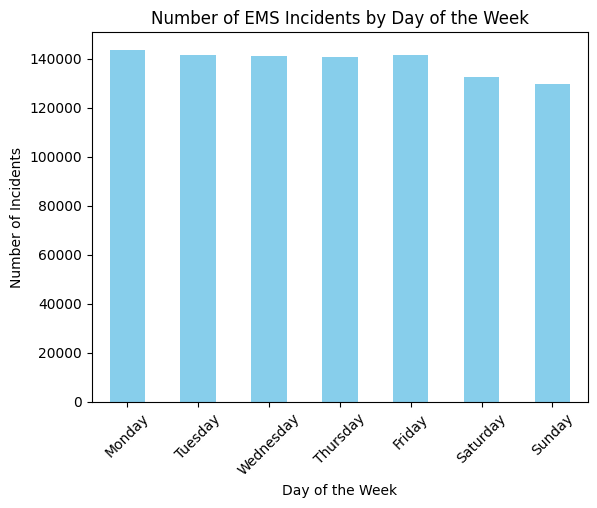

In [14]:
import matplotlib.pyplot as plt

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ordered_incidents = incidents_by_day.reindex(day_order)

ordered_incidents.plot(kind='bar', color='skyblue')
plt.title('Number of EMS Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

The analysis of EMS incident frequencies by day of the week for a given period reveals some interesting patterns about emergency service demands in New York City. Monday stands out as the day with the highest number of incidents, totaling 143,515, which is somewhat surprising as conventional expectations might suggest a weekend peak. This high frequency on Monday could be attributed to various factors, such as increased activity as the city transitions back to the workweek, potentially leading to more accidents and medical emergencies. The relatively high numbers observed on weekdays, with Tuesday, Wednesday, Thursday, and Friday all exceeding 140,000 incidents, further support the idea that weekday routines significantly influence EMS call volumes.

Conversely, the weekend shows a noticeable decrease in incident counts, with Saturday and Sunday having the lowest frequencies, 132,291 and 129,512 respectively. This trend might indicate that while recreational activities are high during weekends, the types of engagements might not result in as many emergency calls as those related to weekday commutes and work-related stressors. Moreover, the drop in incidents during weekends could also be influenced by fewer operational businesses and services, which typically see a higher concentration of accidents during weekdays. Understanding these patterns can help EMS providers better prepare and allocate resources efficiently, ensuring prompt and effective responses when demand peaks.

### 2. Location-Based Frequency Analysis
Objective: This analysis aims to explore the distribution of EMS incidents across the various boroughs of New York City to identify areas with the highest demand for emergency services. Such insights are crucial for strategic planning and resource distribution by emergency management agencies.

In [15]:
incidents_by_borough = filtered_df.groupby('BOROUGH').size()
print(incidents_by_borough)

BOROUGH
BRONX                       231055
BROOKLYN                    272519
MANHATTAN                   222207
QUEENS                      201471
RICHMOND / STATEN ISLAND     42604
UNKNOWN                          1
dtype: int64


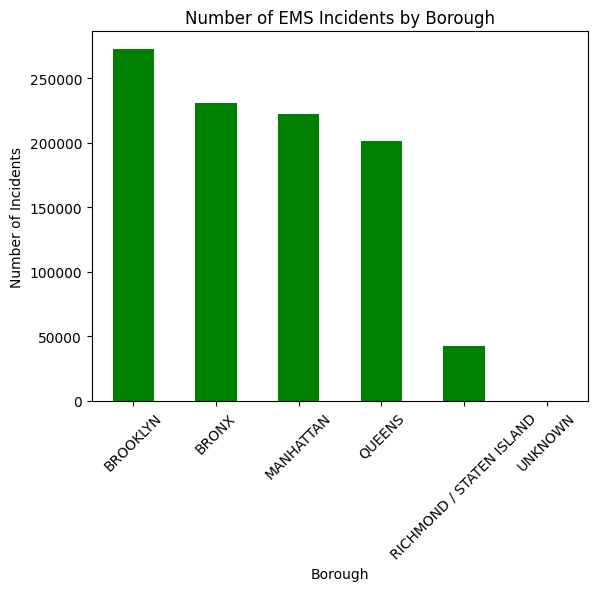

In [16]:
sorted_incidents = incidents_by_borough.sort_values(ascending=False)
sorted_incidents.plot(kind='bar', color='green')
plt.title('Number of EMS Incidents by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

The EMS incident frequencies by borough in New York City highlight significant disparities in emergency service demands across the different areas. Brooklyn leads with the highest number of incidents at 272,519, followed closely by the Bronx with 231,055 incidents. This elevated frequency in Brooklyn and the Bronx suggests a higher demand for emergency services, potentially due to larger population densities, socioeconomic factors, and varying levels of urban activity. Manhattan also sees a substantial number of incidents, totaling 222,207, which could be influenced by the high volume of daily commuters and tourists, despite its smaller residential population compared to Brooklyn and the Bronx.

In contrast, Queens reports a lower count of 201,471 incidents, and Richmond/Staten Island, the least populous of the boroughs, has significantly fewer incidents at 42,604. The notably lower figure for Richmond/Staten Island may reflect its lower population density and possibly fewer risk factors that typically lead to EMS calls.

### 3. Response Time Analysis

Objectives: The objective of this analysis is to evaluate the average response times, measured in seconds, across different boroughs in New York City to determine the efficiency of EMS services in these areas. This analysis seeks to identify specific boroughs that may be experiencing delays and require interventions to improve EMS response times.

In [17]:
average_response_time = filtered_df.groupby('BOROUGH')['INCIDENT_RESPONSE_SECONDS_QY'].mean()
print(average_response_time)

BOROUGH
BRONX                       688.497527
BROOKLYN                    631.931733
MANHATTAN                   706.310643
QUEENS                      588.936944
RICHMOND / STATEN ISLAND    518.857948
UNKNOWN                       0.000000
Name: INCIDENT_RESPONSE_SECONDS_QY, dtype: float64


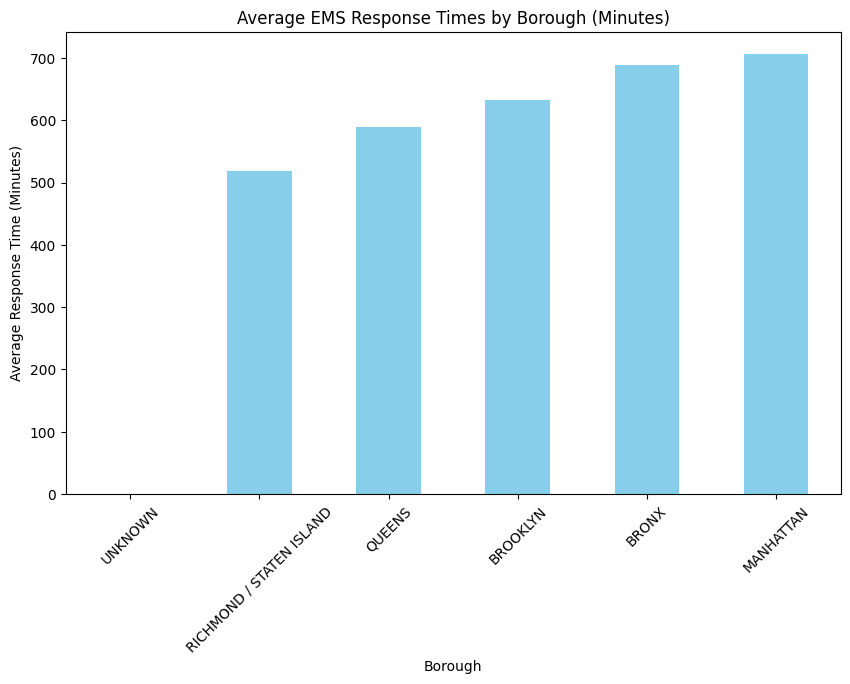

In [18]:
average_response_time_sorted = average_response_time.sort_values()
plt.figure(figsize=(10, 6))
average_response_time_sorted.plot(kind='bar', color='skyblue')
plt.title('Average EMS Response Times by Borough (Minutes)')
plt.xlabel('Borough')
plt.ylabel('Average Response Time (Minutes)')
plt.xticks(rotation=45)
plt.show()

The results of the analysis reveal significant variations in EMS response times across different boroughs. Manhattan registers the highest average response time at approximately 706.31 seconds, followed by the Bronx with an average of 688.50 seconds. These higher response times could be influenced by factors such as traffic congestion, urban density, and possibly the geographical layout of these areas, which may complicate navigation and access during emergencies.

Conversely, Richmond/Staten Island exhibits the lowest average response time of about 518.86 seconds, followed by Queens with 588.94 seconds. The relatively lower response times in these boroughs might be due to less traffic congestion and a more straightforward street layout, facilitating faster EMS access. The 'UNKNOWN' category shows a response time of 0 seconds, which likely indicates missing or incorrectly recorded data rather than an actual measurement. This discrepancy underscores the importance of maintaining accurate and comprehensive data collection processes to ensure the reliability of response time assessments and subsequent resource allocation decisions.

C:\Users\Wujia\AppData\Local\Temp\ipykernel_4512\1842918928.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_boroughs, rotation=45)


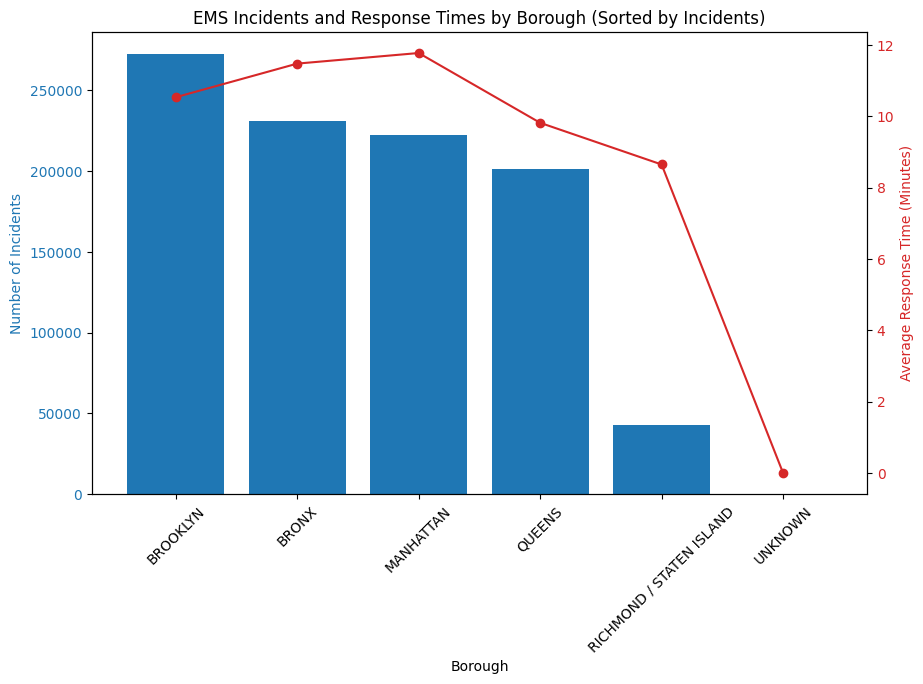

In [19]:
filtered_df['INCIDENT_RESPONSE_SECONDS_QY'] = pd.to_numeric(filtered_df['INCIDENT_RESPONSE_SECONDS_QY'], errors='coerce') / 60

average_response_time = filtered_df.groupby('BOROUGH')['INCIDENT_RESPONSE_SECONDS_QY'].mean()
incidents_by_borough = filtered_df.groupby('BOROUGH').size()

combined_data = pd.DataFrame({
    'Average Response Time': average_response_time,
    'Number of Incidents': incidents_by_borough
})


combined_data = combined_data.sort_values(by='Number of Incidents', ascending=False)

sorted_boroughs = combined_data.index
sorted_incidents = combined_data['Number of Incidents']
sorted_response_times = combined_data['Average Response Time']

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Borough')
ax1.set_ylabel('Number of Incidents', color=color)
ax1.bar(sorted_boroughs, sorted_incidents, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(sorted_boroughs, rotation=45)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Average Response Time (Minutes)', color=color)  
ax2.plot(sorted_boroughs, sorted_response_times, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('EMS Incidents and Response Times by Borough (Sorted by Incidents)')
plt.show()



The dual-axis chart depicting EMS incidents and response times across New York City boroughs provides critical insights into operational efficiencies and emergency service demands. Brooklyn, the Bronx, and Manhattan display the highest number of incidents, suggesting these areas experience the most substantial EMS workload. Interestingly, despite the high volume of calls, the average response times in these boroughs remain relatively consistent, with Manhattan and the Bronx showing slightly higher times than Brooklyn. This indicates that while EMS services are heavily tasked in these regions, the response efficiency is managed to a reasonable extent given the high demand.

In contrast, Richmond/Staten Island, with significantly fewer incidents, exhibits the fastest response times, which may be due to less traffic congestion and easier navigation compared to more densely populated boroughs. The 'UNKNOWN' category demonstrates minimal incidents and an exceptionally low response time, likely reflecting data inaccuracies or entries with missing geographical information. This visualization underscores the importance of targeted resource allocation and strategic planning, particularly in boroughs with high incident rates to ensure timely EMS responses despite the challenges posed by higher demand.

### 4. Incident Type Distribution

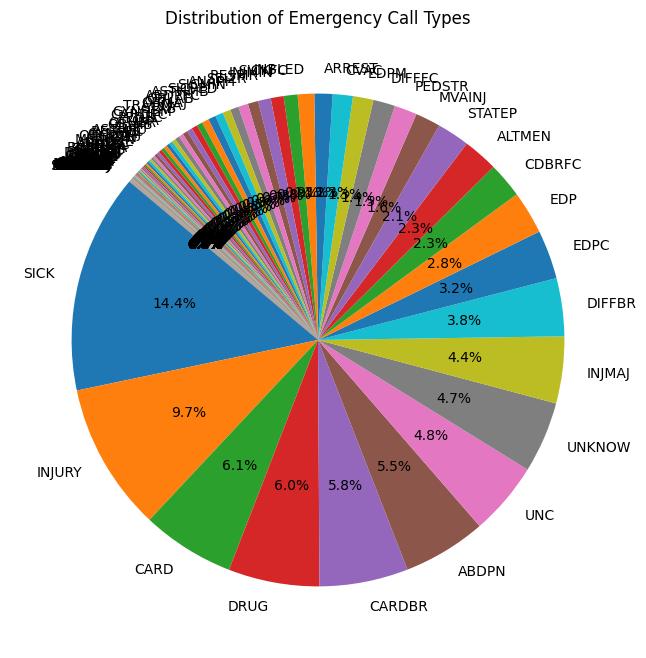

In [20]:
import matplotlib.pyplot as plt

# Count the frequency of each type of call
call_types = filtered_df['FINAL_CALL_TYPE'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(call_types, labels=call_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emergency Call Types')
plt.show()



The pie chart illustrates a diverse range of emergency call types handled by the EMS, with 'SICK' and 'INJURY' being the most prevalent categories, accounting for 14.4% and 9.7% of the calls, respectively. This indicates a significant portion of EMS resources are dedicated to managing general medical sickness and physical injuries. Other notable categories include 'CARD' (cardiac issues) and 'DRUG' related emergencies, suggesting a substantial demand for EMS interventions in cardiovascular and substance-related incidents. The multitude of smaller segments highlights the complex and varied nature of emergencies that the EMS must be prepared to handle, emphasizing the need for well-rounded training and equipment.

### 5. Temporal Analysis of Incident Types Over Time

The objective of this analysis is to explore the monthly distribution of selected types of EMS calls over the year, focusing on "SICK", "INJURY", "CARD", "DRUG", and "CARDBR". This investigation aims to identify seasonal trends and temporal patterns in the demand for emergency medical services, which can inform resource allocation and preparedness strategies.

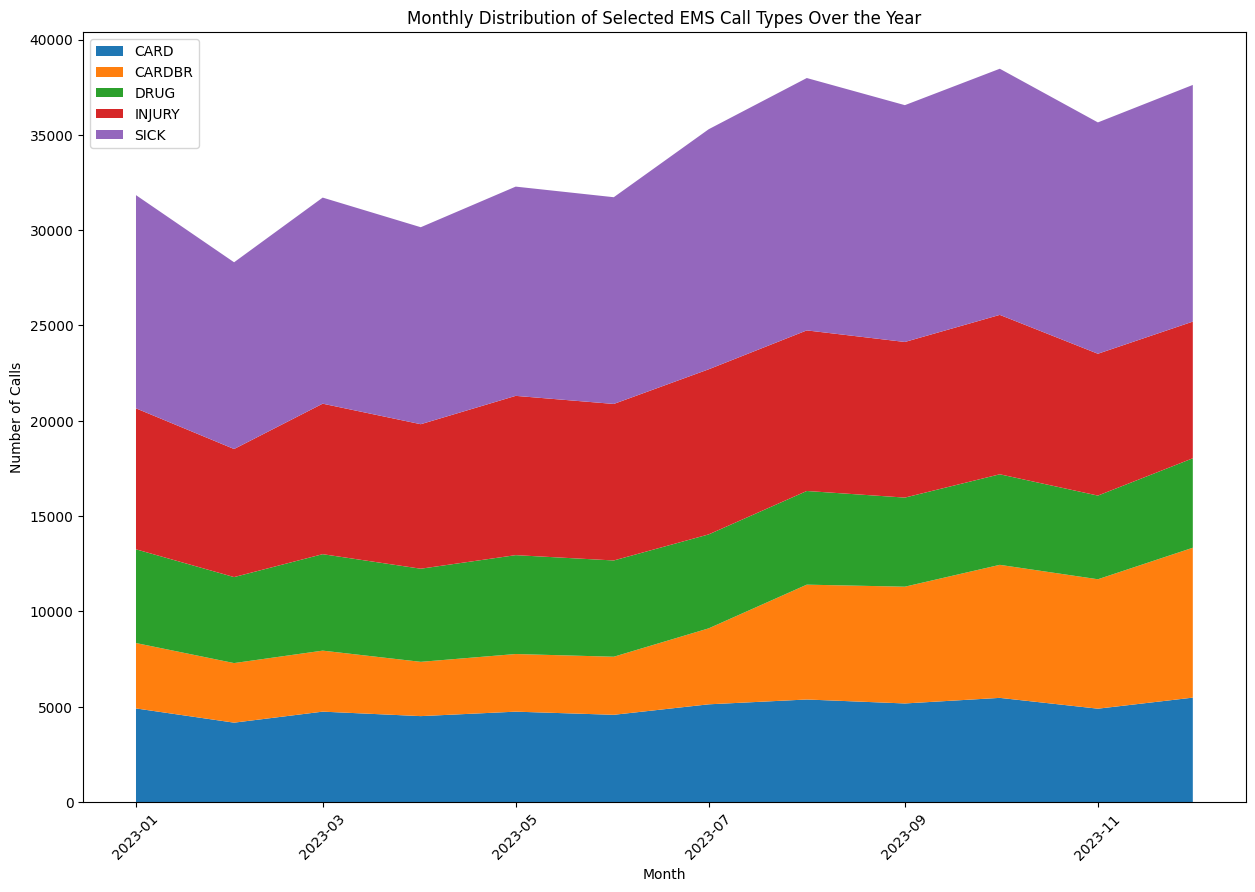

In [24]:
filtered_df['Month'] = filtered_df['INCIDENT_DATETIME'].dt.to_period('M')
focus_types = ["SICK", "INJURY", "CARD", "DRUG", "CARDBR"]
data = filtered_df[filtered_df['FINAL_CALL_TYPE'].isin(focus_types)]

monthly_call_types = data.groupby(['Month', 'FINAL_CALL_TYPE']).size().unstack(fill_value=0)

monthly_call_types = monthly_call_types.reindex(pd.period_range(min(data['Month']), max(data['Month']), freq='M'), fill_value=0)

plt.figure(figsize=(15, 10))
plt.stackplot(monthly_call_types.index.to_timestamp(), monthly_call_types.T, labels=monthly_call_types.columns)
plt.title('Monthly Distribution of Selected EMS Call Types Over the Year')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()



The stacked area chart vividly illustrates how the volume of different emergency call types fluctuates throughout the year. Notably, calls for "SICK" incidents dominate the dataset, peaking during the winter months, which is consistent with the expected increase in illness during colder seasons. This is followed by "INJURY" and "CARD" related calls, which show less seasonal variation but maintain a steady presence throughout the year, indicating a consistent need for response to these emergencies.

"CARD" calls (cardiac incidents) exhibit a slight increase during the winter, possibly linked to the increased cardiovascular stress associated with colder temperatures. Meanwhile, "DRUG" related emergencies maintain a relatively steady occurrence throughout the year, with no significant peaks or troughs, suggesting a persistent, ongoing challenge for EMS services. The "CARDBR" (presumably cardiac or respiratory) category shows variability but does not exhibit clear seasonal trends, indicating that these emergencies may be influenced by factors other than seasonality.

This analysis highlights the critical importance of understanding temporal dynamics in emergency call types, enabling EMS providers to better prepare for periods of high demand. Such insights are crucial for improving response strategies, ensuring adequate staffing, and ultimately enhancing patient care outcomes throughout the year.